In [2]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [104]:
import pandas as pd
import numpy as np
import os, shutil
from fastai.vision import *
from fastai.widgets import ClassConfusion

In [105]:

metadata_path='/home/jupyter/covid-chestxray-dataset/metadata.csv'
df=pd.read_csv(metadata_path)

#types we're interested in
covid_patients=df['finding']=='COVID-19'
CT=df['view']=='CT'
PA=df['view']=='PA'

# %%
df[covid_patients & CT].shape
df[covid_patients & PA].shape
# %%
PA_covid=df[covid_patients & PA]
Others=df[~covid_patients & PA]
covid_files=[files for files in PA_covid['filename']]
other_files=[files for files in Others['filename']]
print(type(covid_files))

<class 'list'>


In [106]:
test ={'test_files': ["03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg",
"01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg",
"1-s2.0-S0929664620300449-gr2_lrg-a.jpg",
"2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg",
"1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg",
"171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg",
"1-s2.0-S1684118220300608-main.pdf-002.jpg",
"1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg",
"21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg"]}
test_files = (["03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg",
"01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg",
"1-s2.0-S0929664620300449-gr2_lrg-a.jpg",
"2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg",
"1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg",
"171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg",
"1-s2.0-S1684118220300608-main.pdf-002.jpg",
"1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg",
"21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg"])
test_df =  pd.DataFrame(test, columns=['test_files'])

In [107]:
test_df.head(10)

,test_files
0,03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
1,01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
2,1-s2.0-S0929664620300449-gr2_lrg-a.jpg
3,2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
4,1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
5,171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg
6,1-s2.0-S1684118220300608-main.pdf-002.jpg
7,1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg
8,21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg


In [108]:
path = '/home/jupyter/covid-chestxray-dataset'
destpath = path +'/data/covid', path +'/data/other', path +'/data/test'
srcpath = '/home/jupyter/covid-chestxray-dataset/images'

for root, dirs, files in os.walk(srcpath):
  print("root", root)
  if not os.path.isdir(destpath[0]):
    os.makedirs(destpath[0])
  if not os.path.isdir(destpath[1]):
    os.makedirs(destpath[1])
  if not os.path.isdir(destpath[2]):
    os.makedirs(destpath[2])
  for file in files:
    if file in covid_files:
      #print("here?")
      shutil.copy((root+'/'+file),destpath[0])
    if file in other_files:
      shutil.copy((root+'/'+file),destpath[1])
    if file in test_files:
      shutil.copy((root+'/'+file),destpath[2])

root /home/jupyter/covid-chestxray-dataset/images
root /home/jupyter/covid-chestxray-dataset/images/.ipynb_checkpoints


In [109]:

print("Number of images in Other: {}".format(len(other_files)),"Number of images in Covid: {}".format(len(covid_files)),"Number of images in Test Set: {}".format(len(test_files)) )

Number of images in Other: 23 Number of images in Covid: 76 Number of images in Test Set: 9


In [110]:

classes=['covid','other']


In [111]:
data = ImageDataBunch.from_folder('/home/jupyter/covid-chestxray-dataset/data', train='.', valid_pct=0.2,test='test',
        ds_tfms=get_transforms(), bs=8, size=512, num_workers=4).normalize(imagenet_stats)

In [112]:
#len(data)
data.classes

['covid', 'other']

In [113]:
print(len(data.train_ds),len(data.valid_ds),len(data.test_ds.x))


80 19 9


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During h

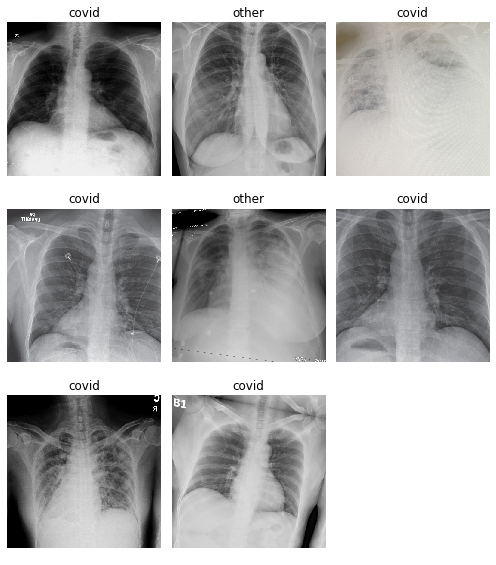

In [114]:
data.show_batch(rows=5, figsize=(7,8))


In [115]:
precision=Precision()
recall=Recall()
AUC=AUROC()

In [116]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC))


In [117]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time


OSError: [Errno 12] Cannot allocate memory

In [88]:
learn.fit_one_cycle(2)


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.987117,1.284319,0.736842,0.500000,1.000000,0.914286,00:12
1,0.834405,0.843641,0.631579,0.400000,0.800000,0.885714,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


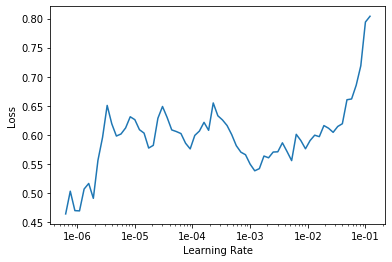

In [89]:
learn.lr_find()
learn.recorder.plot()

In [90]:
#os.mkdir('check')
def custom_path_save(self, name:PathOrStr, path='check', return_path:bool=False, with_opt:bool=True):
        "Save model and optimizer state (if `with_opt`) with `name` to `self.model_dir`."
        # delete #  path = self.path/self.model_dir/f'{name}.pth'
        # my addition: start
        if path=='': path = self.path/self.model_dir/f'{name}.pth'
        else: path = f'{path}/{name}.pth'
        # end
        if not with_opt: state = get_model(self.model).state_dict()
        else: state = {'model': get_model(self.model).state_dict(), 'opt':self.opt.state_dict()}
        torch.save(state, path)
        if return_path: return path

def custom_path_load(self, name:PathOrStr, path='check', device:torch.device=None, strict:bool=True, with_opt:bool=None,purge=False):
        "Load model and optimizer state (if `with_opt`) `name` from `self.model_dir` using `device`."
        if device is None: device = self.data.device
        # delete # state = torch.load(self.path/self.model_dir/f'{name}.pth', map_location=device)
        # my addition: start
        if path=='': path = self.path/self.model_dir/f'{name}.pth'
        else: path = f'{path}/{name}.pth'
        state = torch.load(path, map_location=device) 
        # end
        if set(state.keys()) == {'model', 'opt'}:
            get_model(self.model).load_state_dict(state['model'], strict=strict)
            if ifnone(with_opt,True):
                if not hasattr(self, 'opt'): opt = self.create_opt(defaults.lr, self.wd)
                try:    self.opt.load_state_dict(state['opt'])
                except: pass
        else:
            if with_opt: warn("Saved filed doesn't contain an optimizer state.")
            get_model(self.model).load_state_dict(state, strict=strict)
        return self

learn.save = custom_path_save.__get__(learn)
learn.load = custom_path_load.__get__(learn)
model_path ='check'

In [91]:
learn.save('Corona_model_stage1')


In [92]:
learn.unfreeze()


In [93]:
learn.fit_one_cycle(10, max_lr=slice(9e-07,1e-06))


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.931729,0.841413,0.631579,0.416667,1.000000,0.928571,00:12
1,0.753673,0.674953,0.631579,0.400000,0.800000,0.900000,00:12
2,0.720496,0.809262,0.631579,0.400000,0.800000,0.885714,00:11
3,0.678524,0.699572,0.684211,0.444444,0.800000,0.900000,00:12
4,0.720108,0.836641,0.684211,0.444444,0.800000,0.914286,00:11
5,0.708157,0.699099,0.736842,0.500000,0.800000,0.885714,00:11
6,0.690034,0.711310,0.631579,0.400000,0.800000,0.900000,00:11
7,0.673423,0.606577,0.736842,0.500000,0.800000,0.900000,00:11
8,0.688341,0.707888,0.684211,0.444444,0.800000,0.900000,00:12
9,0.664682,0.791657,0.736842,0.500000,0.800000,0.885714,00:11


In [94]:
learn.save('Corona_model_stage2')


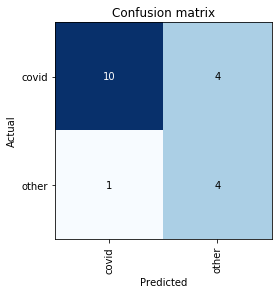

In [95]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [96]:
ClassConfusion(interp, classes, is_ordered=False, figsize=(8,8))


Please enter a value for `k`, or the top images you will see:  2


100%|██████████| 2/2 [00:04<00:00,  2.19s/it]


<Figure size 432x288 with 0 Axes>

In [97]:
learn.fit_one_cycle(40, max_lr=slice(8e-06,1e-05))


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.477998,0.786207,0.684211,0.444444,0.800000,0.900000,00:12
1,0.517451,0.549601,0.684211,0.444444,0.800000,0.914286,00:12
2,0.564970,0.618858,0.789474,0.555556,1.000000,0.942857,00:12
3,0.578825,0.694173,0.684211,0.454545,1.000000,0.928571,00:12
4,0.519953,0.677171,0.684211,0.454545,1.000000,0.971429,00:12
5,0.521500,0.707711,0.736842,0.500000,1.000000,0.957143,00:12
6,0.528262,0.535815,0.789474,0.555556,1.000000,0.971429,00:11
7,0.505711,0.673753,0.789474,0.555556,1.000000,0.957143,00:12
8,0.488622,0.625359,0.842105,0.625000,1.000000,0.971429,00:11
9,0.485609,0.538813,0.842105,0.625000,1.000000,0.971429,00:11


In [98]:
learn.save('Corona_model_stage4.pth')


In [99]:
from fastai.vision import *
from fastai.callbacks.hooks import *
import scipy.ndimage

class GradCam():
    @classmethod
    def from_interp(cls,learn,interp,img_idx,ds_type=DatasetType.Valid,include_label=False):
        # produce heatmap and xb_grad for pred label (and actual label if include_label is True)
        if ds_type == DatasetType.Valid:
            ds = interp.data.valid_ds
        elif ds_type == DatasetType.Test:
            ds = interp.data.test_ds
            include_label=False
        else:
            return None
        
        x_img = ds.x[img_idx]
        xb,_ = interp.data.one_item(x_img)
        xb_img = Image(interp.data.denorm(xb)[0])
        probs = interp.preds[img_idx].numpy()

        pred_idx = interp.pred_class[img_idx].item() # get class idx of img prediction label
        hmap_pred,xb_grad_pred = get_grad_heatmap(learn,xb,pred_idx,size=xb_img.shape[-1])
        prob_pred = probs[pred_idx]
        
        actual_args=None
        if include_label:
            actual_idx = ds.y.items[img_idx] # get class idx of img actual label
            if actual_idx!=pred_idx:
                hmap_actual,xb_grad_actual = get_grad_heatmap(learn,xb,actual_idx,size=xb_img.shape[-1])
                prob_actual = probs[actual_idx]
                actual_args=[interp.data.classes[actual_idx],prob_actual,hmap_actual,xb_grad_actual]
        
        return cls(xb_img,interp.data.classes[pred_idx],prob_pred,hmap_pred,xb_grad_pred,actual_args)
    
    @classmethod
    def from_one_img(cls,learn,x_img,label1=None,label2=None):
        '''
        learn: fastai's Learner
        x_img: fastai.vision.image.Image
        label1: generate heatmap according to this label. If None, this wil be the label with highest probability from the model
        label2: generate additional heatmap according to this label
        '''
        pred_class,pred_idx,probs = learn.predict(x_img)
        label1= str(pred_class) if not label1 else label1
        
        xb,_ = learn.data.one_item(x_img)
        xb_img = Image(learn.data.denorm(xb)[0])
        probs = probs.numpy()
        
        label1_idx = learn.data.classes.index(label1)
        hmap1,xb_grad1 = get_grad_heatmap(learn,xb,label1_idx,size=xb_img.shape[-1])
        prob1 = probs[label1_idx]
        
        label2_args = None
        if label2:
            label2_idx = learn.data.classes.index(label2)
            hmap2,xb_grad2 = get_grad_heatmap(learn,xb,label2_idx,size=xb_img.shape[-1])
            prob2 = probs[label2_idx]
            label2_args = [label2,prob2,hmap2,xb_grad2]
            
        return cls(xb_img,label1,prob1,hmap1,xb_grad1,label2_args)
    
    def __init__(self,xb_img,label1,prob1,hmap1,xb_grad1,label2_args=None):
        self.xb_img=xb_img
        self.label1,self.prob1,self.hmap1,self.xb_grad1 = label1,prob1,hmap1,xb_grad1
        if label2_args:
            self.label2,self.prob2,self.hmap2,self.xb_grad2 = label2_args
            
    def plot(self,plot_hm=True,plot_gbp=True):
        if not plot_hm and not plot_gbp:
            plot_hm=True
        cols = 5 if hasattr(self, 'label2') else 3
        if not plot_gbp or not plot_hm:
            cols-= 2 if hasattr(self, 'label2') else 1

        fig,row_axes = plt.subplots(1,cols,figsize=(cols*5,5))  
        col=0
        size=self.xb_img.shape[-1]
        self.xb_img.show(row_axes[col]);col+=1
        
        label1_title = f'1.{self.label1} {self.prob1:.3f}'
        if plot_hm:
            show_heatmap(self.hmap1,self.xb_img,size,row_axes[col])
            row_axes[col].set_title(label1_title);col+=1
        if plot_gbp:
            row_axes[col].imshow(self.xb_grad1)
            row_axes[col].set_axis_off()
            row_axes[col].set_title(label1_title);col+=1
        
        if hasattr(self, 'label2'):
            label2_title = f'2.{self.label2} {self.prob2:.3f}'
            if plot_hm:
                show_heatmap(self.hmap2,self.xb_img,size,row_axes[col])
                row_axes[col].set_title(label2_title);col+=1
            if plot_gbp:
                row_axes[col].imshow(self.xb_grad2)
                row_axes[col].set_axis_off()
                row_axes[col].set_title(label2_title)
        # plt.tight_layout()
        fig.subplots_adjust(wspace=0, hspace=0)
        # fig.savefig('data_draw/both/gradcam.png')

def minmax_norm(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))
def scaleup(x,size):
    scale_mult=size/x.shape[0]
    upsampled = scipy.ndimage.zoom(x, scale_mult)
    return upsampled

# hook for Gradcam
def hooked_backward(m,xb,target_layer,clas):
    with hook_output(target_layer) as hook_a: #hook at last layer of group 0's output (after bn, size 512x7x7 if resnet34)
        with hook_output(target_layer, grad=True) as hook_g: # gradient w.r.t to the target_layer
            preds = m(xb)
            preds[0,int(clas)].backward() # same as onehot backprop
    return hook_a,hook_g

def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)
        
# hook for guided backprop
def hooked_ReLU(m,xb,clas):
    relu_modules = [module[1] for module in m.named_modules() if str(module[1]) == "ReLU(inplace)"]
    with callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False) as _:
        preds = m(xb)
        preds[0,int(clas)].backward()
        
def guided_backprop(learn,xb,y):
    xb = xb.cuda()
    m = learn.model.eval();
    xb.requires_grad_();
    if not xb.grad is None:
        xb.grad.zero_(); 
    hooked_ReLU(m,xb,y);
    return xb.grad[0].cpu().numpy()

def show_heatmap(hm,xb_im,size,ax=None):
    if ax is None:
        _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.8, extent=(0,size,size,0),
              interpolation='bilinear',cmap='magma');

def get_grad_heatmap(learn,xb,y,size):
    '''
    Main function to get hmap for heatmap and xb_grad for guided backprop
    '''
    xb = xb.cuda()
    m = learn.model.eval();
    target_layer = m[0][-1][-1] # last layer of group 0
    hook_a,hook_g = hooked_backward(m,xb,target_layer,y)
    
    target_act= hook_a.stored[0].cpu().numpy()
    target_grad = hook_g.stored[0][0].cpu().numpy()
    
    mean_grad = target_grad.mean(1).mean(1)
#     hmap = (target_act*mean_grad[...,None,None]).mean(0)
    hmap = (target_act*mean_grad[...,None,None]).sum(0)
    hmap = np.where(hmap >= 0, hmap, 0)
    
    xb_grad = guided_backprop(learn,xb,y) # (3,224,224)        
    #minmax norm the grad
    xb_grad = minmax_norm(xb_grad)
    hmap_scaleup = minmax_norm(scaleup(hmap,size)) # (224,224)
    
    # multiply xb_grad and hmap_scaleup and switch axis
    xb_grad = np.einsum('ijk, jk->jki',xb_grad, hmap_scaleup) #(224,224,3)
    
    return hmap,xb_grad

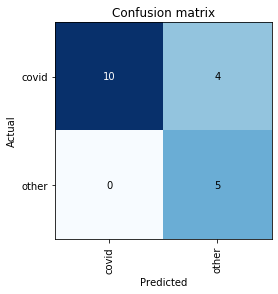

In [100]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

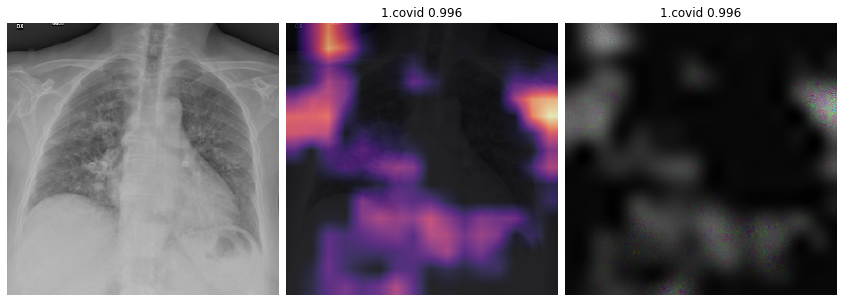

In [102]:
preds, _ = learn.get_preds(ds_type = DatasetType.Test)

from fastai import *
#import GradCam
image = open_image('covid-chestxray-dataset/images/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg')
gcam = GradCam.from_one_img(learn,image)
gcam.plot()


In [103]:
images={filename:open_image(path + '/data/test/'+filename) for filename in test_files}
results={filename:learn.predict(images[filename]) for filename in test_files}
final_df=pd.DataFrame.from_dict(results,orient='index')
final_df.to_csv(path + '/NCOV_test_results.csv', header=True)